# THE SPARKS FOUNDATION INTERNSHIP

# DATA SCIENCE AND BUSINESS ANALYTICS

# TASK 2: Prediction using unsupervised ML

# Name: Yesha Jobanputra

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
#loading data
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
#checking if there are any null values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# Understanding the given data

In [4]:
#function to describe count, mean and percentile of the dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Finding optimum number of cluster using Elbow Method

D:\AnacondaNavigator\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


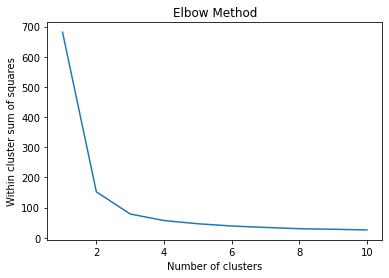

In [18]:
x=iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
within_cluster_sum_of_squares=[]
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++',
                 max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    within_cluster_sum_of_squares.append(kmeans.inertia_)
    
    
plt.plot(range(1, 11), within_cluster_sum_of_squares)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

From above graph we can see the number of optimum clusters = 3

In [12]:
#applying K-means clustering
kmeans=KMeans(n_clusters=3, init='k-means++',
                 max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)

In [13]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# Visualization of given data

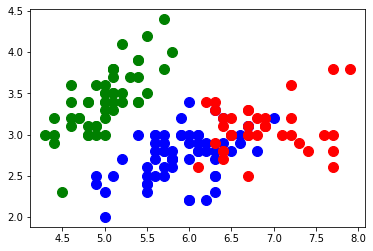

In [14]:
#visualization
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1],
           s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1],
           s=100, c='green', label='Iris-setosa')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1],
           s=100, c='red', label='Iris-virginica')

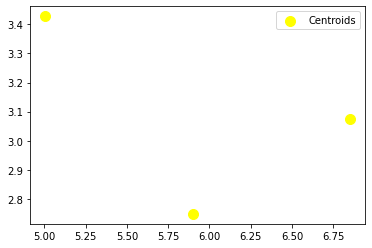

In [16]:
#plotting the centroids of cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s=100, c='yellow', label='Centroids')
plt.legend()

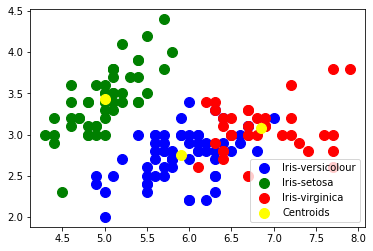

In [17]:
#final visualization with centroids
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1],
           s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1],
           s=100, c='green', label='Iris-setosa')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1],
           s=100, c='red', label='Iris-virginica')
#plotting centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s=100, c='yellow', label='Centroids')
plt.legend()